<a href="https://colab.research.google.com/github/tlnswinburne/birdclassification/blob/main/A2COS30082.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import tarfile

def extract_tgz(file_path, extract_path='./'):
    """Extracts a .tgz file to the specified directory."""
    with tarfile.open(file_path, 'r:gz') as file:
        file.extractall(path=extract_path)

extract_tgz('/content/drive/My Drive/COS30082/annotations.tgz')
extract_tgz('/content/drive/My Drive/COS30082/lists.tgz')
extract_tgz('/content/drive/My Drive/COS30082/images.tgz')
extract_tgz('/content/drive/My Drive/COS30082/attributes-yaml.tgz')
extract_tgz('/content/drive/My Drive/COS30082/attributes.tgz')


In [8]:
import os

# Path to folder
folder_path = '/content/images'

# List directories only
folders = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]

# Print the number of directories
print("Number of folders:", len(folders))


Number of folders: 200


In [9]:
import pathlib
import numpy as np

data_dir = pathlib.Path("/content/images")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory
print(class_names)

['._001.Black_footed_Albatross' '._002.Laysan_Albatross'
 '._003.Sooty_Albatross' '._004.Groove_billed_Ani' '._005.Crested_Auklet'
 '._006.Least_Auklet' '._007.Parakeet_Auklet' '._008.Rhinoceros_Auklet'
 '._009.Brewer_Blackbird' '._010.Red_winged_Blackbird'
 '._011.Rusty_Blackbird' '._012.Yellow_headed_Blackbird' '._013.Bobolink'
 '._014.Indigo_Bunting' '._015.Lazuli_Bunting' '._016.Painted_Bunting'
 '._017.Cardinal' '._018.Spotted_Catbird' '._019.Gray_Catbird'
 '._020.Yellow_breasted_Chat' '._021.Eastern_Towhee'
 '._022.Chuck_will_Widow' '._023.Brandt_Cormorant'
 '._024.Red_faced_Cormorant' '._025.Pelagic_Cormorant'
 '._026.Bronzed_Cowbird' '._027.Shiny_Cowbird' '._028.Brown_Creeper'
 '._029.American_Crow' '._030.Fish_Crow' '._031.Black_billed_Cuckoo'
 '._032.Mangrove_Cuckoo' '._033.Yellow_billed_Cuckoo'
 '._034.Gray_crowned_Rosy_Finch' '._035.Purple_Finch'
 '._036.Northern_Flicker' '._037.Acadian_Flycatcher'
 '._038.Great_Crested_Flycatcher' '._039.Least_Flycatcher'
 '._040.Olive_sid

In [24]:
def read_split_file(filepath):
    with open(filepath, 'r') as file:
        lines = file.read().splitlines()
    return lines

# Set the base directory
base_dir = "/content/images"

# Read the train and test files
train_files = read_split_file(os.path.join(base_dir, '../lists/train.txt'))
test_files = read_split_file(os.path.join(base_dir, '../lists/test.txt'))

combined_files = train_files + test_files

combined_files


['001.Black_footed_Albatross/Black_footed_Albatross_0004_2731401028.jpg',
 '001.Black_footed_Albatross/Black_footed_Albatross_0015_2446377484.jpg',
 '001.Black_footed_Albatross/Black_footed_Albatross_0012_46852255.jpg',
 '001.Black_footed_Albatross/Black_footed_Albatross_0017_1256111444.jpg',
 '001.Black_footed_Albatross/Black_footed_Albatross_0008_1384283201.jpg',
 '001.Black_footed_Albatross/Black_footed_Albatross_0019_416160254.jpg',
 '001.Black_footed_Albatross/Black_footed_Albatross_0005_2755588934.jpg',
 '001.Black_footed_Albatross/Black_footed_Albatross_0010_819241733.jpg',
 '001.Black_footed_Albatross/Black_footed_Albatross_0011_820118444.jpg',
 '001.Black_footed_Albatross/Black_footed_Albatross_0035_1357619035.jpg',
 '001.Black_footed_Albatross/Black_footed_Albatross_0032_1465369016.jpg',
 '001.Black_footed_Albatross/Black_footed_Albatross_0034_2134386992.jpg',
 '001.Black_footed_Albatross/Black_footed_Albatross_0029_2133609753.jpg',
 '001.Black_footed_Albatross/Black_footed_A

In [19]:
print(f"Number of images: {len(combined_files)}")

Number of images: 6033


In [20]:
import random
# Shuffle the combined image paths
random.shuffle(combined_files)

# Define the split_data function
def split_data(data, train_pct, test_pct):
    train_size = int(len(data) * train_pct)
    test_size = int(len(data) * test_pct)

    train_data = data[:train_size]
    test_data = data[train_size:train_size + test_size]
    val_data = data[train_size + test_size:]

    return train_data, test_data, val_data

# Split the image paths into train, test, and validation datasets
train_data, test_data, val_data = split_data(combined_files, 0.70, 0.15)

# Output the results to verify
print("Train Data:", train_data)
print("Test Data:", test_data)
print("Validation Data:", val_data)

Train Data: ['194.Cactus_Wren/Cactus_Wren_0012_323264245.jpg', '165.Chestnut_sided_Warbler/Chestnut_sided_Warbler_0010_211439670.jpg', '153.Philadelphia_Vireo/Philadelphia_Vireo_0030_2383575021.jpg', '003.Sooty_Albatross/Sooty_Albatross_0020_2180373314.jpg', '093.Clark_Nutcracker/Clark_Nutcracker_0010_2642190631.jpg', '019.Gray_Catbird/Gray_Catbird_0013_428645825.jpg', '169.Magnolia_Warbler/Magnolia_Warbler_0007_496023330.jpg', '139.Scarlet_Tanager/Scarlet_Tanager_0002_486825300.jpg', '017.Cardinal/Cardinal_0020_2535141036.jpg', '036.Northern_Flicker/Northern_Flicker_0008_439155047.jpg', '171.Myrtle_Warbler/Myrtle_Warbler_0022_2980085028.jpg', '082.Ringed_Kingfisher/Ringed_Kingfisher_0019_2289718893.jpg', '134.Cape_Glossy_Starling/Cape_Glossy_Starling_0035_1521224737.jpg', '181.Worm_eating_Warbler/Worm_eating_Warbler_0015_2226339905.jpg', '162.Canada_Warbler/Canada_Warbler_0018_3046314747.jpg', '117.Clay_colored_Sparrow/Clay_colored_Sparrow_0024_2446943539.jpg', '126.Nelson_Sharp_taile

In [25]:
print(f"Number of train images: {len(train_data)}")
print(f"Number of test images: {len(test_data)}")
print(f"Number of validation images: {len(val_data)}")

Number of train images: 4223
Number of test images: 904
Number of validation images: 906


In [26]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [27]:
base_dir = '/content/images'  # Base directory where the current dataset is stored
train_dir = '/content/images/train'  # Destination directory for training set
val_dir = '/content/images/val'  # Destination directory for validation set
test_dir = '/content/images/test'  # Destination directory for test set

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


In [28]:
from sklearn.model_selection import train_test_split
import shutil

def move_files_to_directory(file_list, target_directory):
    for filepath in file_list:
        # Create subdirectory structure in target if it doesn't exist
        subdirectory = os.path.join(target_directory, os.path.dirname(filepath))
        os.makedirs(subdirectory, exist_ok=True)

        # Move file to the new directory
        shutil.move(os.path.join(base_dir, filepath), os.path.join(subdirectory, os.path.basename(filepath)))



# Move files
move_files_to_directory(train_data, train_dir)
move_files_to_directory(val_data, val_dir)
move_files_to_directory(test_data, test_dir)


In [29]:
# Rescale
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "categorical",
                                               shuffle = True)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical",
                                             shuffle = False)

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

Found 5453 images belonging to 200 classes.
Found 1664 images belonging to 200 classes.
Found 1640 images belonging to 200 classes.


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense

# Load the InceptionV3 model pre-trained on ImageNet data
# Ensure include_top is False to not include the fully connected layer at the top of the network
base_model = tf.keras.applications.InceptionV3(include_top=False, input_shape=(300, 300, 3))
base_model.trainable = False  # Freeze the base_model

# Create the model using the Sequential API
model = Sequential([
    base_model,  # Add the pre-trained base model
    GlobalAveragePooling2D(),  # Reduce the spatial dimensions
    Dropout(0.5),  # Use dropout for regularization (50% rate)
    Dense(200, activation='softmax')  # Final layer with softmax for multi-class classification
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Optimizer
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Metric to monitor
)

# Train the model with callbacks for early stopping and reducing learning rate on plateau
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

history = model.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    validation_steps=int(0.25 * len(val_data)),
    callbacks=[early_stopping, reduce_lr]
)

# Save the model weights
model.save('birdmodel.h5')  # Specify the correct path


Epoch 1/10
171/171 [==============================] - 808s 5s/step - loss: 4.6501 - accuracy: 0.1161 - val_loss: 2.6607 - val_accuracy: 0.3317 - lr: 0.0010
Epoch 2/10
171/171 [==============================] - 765s 4s/step - loss: 2.7188 - accuracy: 0.3334 - val_loss: 2.0865 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
171/171 [==============================] - 796s 5s/step - loss: 2.0520 - accuracy: 0.4585 - val_loss: 1.6908 - val_accuracy: 0.6130 - lr: 0.0010
Epoch 4/10
171/171 [==============================] - 762s 4s/step - loss: 1.7015 - accuracy: 0.5375 - val_loss: 1.4434 - val_accuracy: 0.6202 - lr: 0.0010
Epoch 5/10
171/171 [==============================] - 789s 5s/step - loss: 1.4285 - accuracy: 0.6028 - val_loss: 1.2094 - val_accuracy: 0.7139 - lr: 0.0010
Epoch 6/10
171/171 [==============================] - 763s 4s/step - loss: 1.2357 - accuracy: 0.6514 - val_loss: 1.1150 - val_accuracy: 0.7596 - lr: 0.0010
Epoch 7/10
171/171 [==============================] - 775s 5s/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 200)               409800    
                                                                 
Total params: 22212584 (84.73 MB)
Trainable params: 409800 (1.56 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [32]:
model.evaluate(test_data)

52/52 [==============================] - 223s 4s/step - loss: 0.8589 - accuracy: 0.8107


[0.858918309211731, 0.8106971383094788]

In [33]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

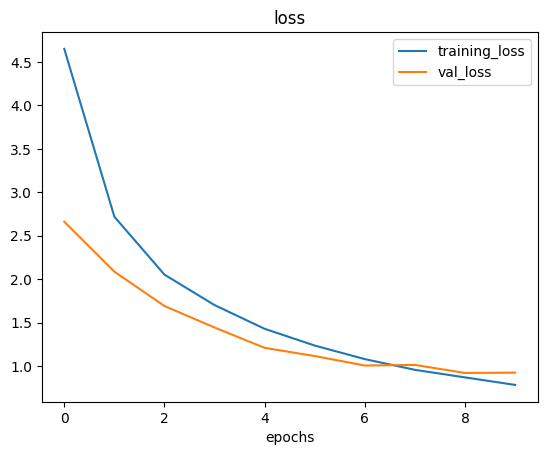

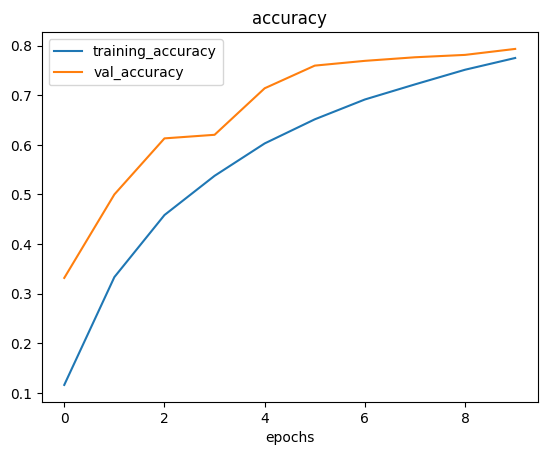

In [34]:
plot_loss_curves(history)

In [35]:
# To begin fine-tuning lets start by setting the last 10 layers as trainable

base_model.trainable = True

# Un-freeze last 10 layers
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile
model.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics = ["accuracy"] )

In [ ]:
# Check which layers are trainable in the InceptionV3 base model
for layer_number, layer in enumerate(model.layers[0].layers):
    print(layer_number, layer.name, layer.trainable)

# Print the total count of trainable variables in the entire model
print("Number of trainable variables:", len(model.trainable_variables))


In [38]:
initial_epochs = 10
fine_tune_epochs = initial_epochs + 1

# Refit the model
history_2 = model.fit(train_data,
                       epochs = fine_tune_epochs,
                       validation_data = val_data,
                       validation_steps = int(0.25*len(val_data)),
                       initial_epoch =  history.epoch[-1],) # Start the epoch where it left before

Epoch 10/11
171/171 [==============================] - 801s 5s/step - loss: 0.8392 - accuracy: 0.7565 - val_loss: 0.8398 - val_accuracy: 0.7981
Epoch 11/11
171/171 [==============================] - 791s 5s/step - loss: 0.7100 - accuracy: 0.7864 - val_loss: 0.9306 - val_accuracy: 0.7740


In [39]:
model.save('birdmodel_epoch1011.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
model.evaluate(test_data)

52/52 [==============================] - 221s 4s/step - loss: 0.8300 - accuracy: 0.8149


[0.8299538493156433, 0.8149038553237915]

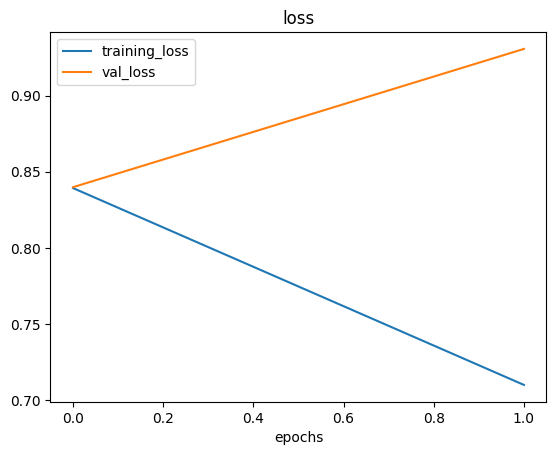

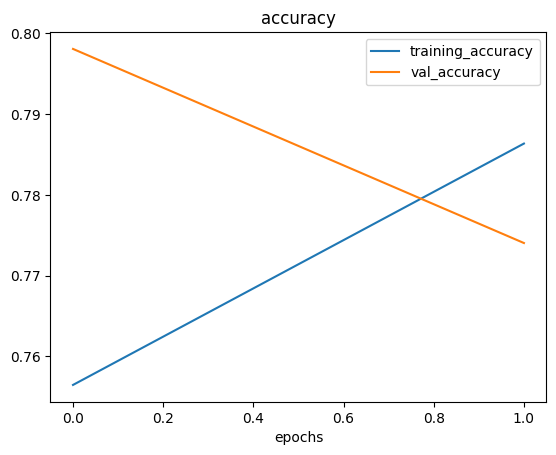

In [41]:
plot_loss_curves(history_2)

In [42]:
loss, accuracy = model.evaluate(test_data)
print("Top-1 Accuracy:", accuracy)

52/52 [==============================] - 227s 4s/step - loss: 0.8300 - accuracy: 0.8149
Top-1 Accuracy: 0.8149038553237915


In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data Generators with Correct Target Size
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(300, 300),  # Correct target size
    class_mode="categorical",
    shuffle=True
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(300, 300),  # Correct target size
    class_mode="categorical",
    shuffle=False  # Important for evaluation
)

val_data = valid_datagen.flow_from_directory(
    directory=val_dir,
    batch_size=32,
    target_size=(300, 300),  # Correct target size
    class_mode="categorical"
)


Found 5453 images belonging to 200 classes.
Found 1664 images belonging to 200 classes.
Found 1640 images belonging to 200 classes.


In [48]:
steps_per_epoch = np.ceil(test_data.samples / test_data.batch_size)
print("Total number of samples:", test_data.samples)
print("Batch size:", test_data.batch_size)
print("Calculated steps per epoch:", steps_per_epoch)


Total number of samples: 1664
Batch size: 32
Calculated steps per epoch: 52.0


In [49]:
import numpy as np

# Initialize lists to store results
y_pred = []
y_true = []

# Ensurereset the test_data generator to start from the first batch
test_data.reset()

# Loop over all batches in the test_data
for _ in range(int(steps_per_epoch)):
    x_batch, y_batch = next(test_data)
    y_pred_batch = model.predict(x_batch)
    y_pred_labels = np.argmax(y_pred_batch, axis=1)
    y_true_labels = np.argmax(y_batch, axis=1)
    y_pred.extend(y_pred_labels)
    y_true.extend(y_true_labels)

# Calculate confusion matrix and class-wise accuracies
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, y_pred)
class_accuracies = cm.diagonal() / cm.sum(axis=1)
average_accuracy_per_class = np.mean(class_accuracies)

print("Average Accuracy Per Class:", average_accuracy_per_class)


1/1 [==============================] - 7s 7s/step
Average Accuracy Per Class: 0.6335712102440043


In [50]:
class_names = [k for k, v in sorted(test_data.class_indices.items(), key=lambda item: item[1])]
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


                                    precision    recall  f1-score   support

        001.Black_footed_Albatross       0.52      1.00      0.69        12
              002.Laysan_Albatross       0.80      0.67      0.73         6
               003.Sooty_Albatross       1.00      0.17      0.29         6
             004.Groove_billed_Ani       0.80      1.00      0.89         8
                005.Crested_Auklet       1.00      0.64      0.78        11
                  006.Least_Auklet       1.00      0.56      0.71         9
               007.Parakeet_Auklet       0.33      1.00      0.50         4
             008.Rhinoceros_Auklet       1.00      0.42      0.59        12
              009.Brewer_Blackbird       0.43      0.75      0.55         8
          010.Red_winged_Blackbird       0.82      0.90      0.86        10
               011.Rusty_Blackbird       1.00      0.10      0.18        10
       012.Yellow_headed_Blackbird       0.83      0.62      0.71         8
           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
